In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv(r"C:\Student Performance Prediction\student-por.csv")

Here’s a brief explanation of what each column represents:

school: School name
sex: Gender of the student
age: Age of the student
address: Type of address (urban or rural)
famsize: Family size (either "LE3" for less than or equal to 3 members, or "GT3" for more than 3 members)
Pstatus: Parent's cohabitation status (living together or apart)
Medu: Mother's education level (numeric: 0 to 4)
Fedu: Father's education level (numeric: 0 to 4)
Mjob: Mother's job (e.g., teacher, health, services, etc.)
Fjob: Father's job (e.g., teacher, health, services, etc.)
reason: Reason for choosing the school (e.g., close to home, reputation, etc.)
guardian: Student's guardian (e.g., mother, father, other)
traveltime: Travel time to school (numeric: 1 to 4)
studytime: Study time per week (numeric: 1 to 4)
failures: Number of past class failures
schoolsup: Extra educational support (yes/no)
famsup: Family educational support (yes/no)
paid: Extra paid classes (yes/no)
activities: Extra-curricular activities (yes/no)
nursery: Attended nursery school (yes/no)
higher: Wants to pursue higher education (yes/no)
internet: Internet access at home (yes/no)
romantic: With a romantic relationship (yes/no)
famrel: Quality of family relationships (numeric: 1 to 5)
freetime: Free time after school (numeric: 1 to 5)
goout: Going out with friends (numeric: 1 to 5)
Dalc: Workday alcohol consumption (numeric: 1 to 5)
Walc: Weekend alcohol consumption (numeric: 1 to 5)
health: Current health status (numeric: 1 to 5)
absences: Number of school absences
G1: First period grade
G2: Second period grade
G3: Final grade (usually the most important grade)

In [11]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [12]:
df = df.drop(labels='address', axis=1)
df = df.drop(labels='romantic', axis=1)

In [13]:
#
df.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13


DATA PREPROCESSING: 
Checking the dataset contain any null values or not

In [14]:
df.isnull().sum()

school        0
sex           0
age           0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [15]:
#In dataset there are no null values.

In [16]:
df.value_counts()

school  sex  age  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
GP      F    15   GT3      A        3     3     other     health    reputation  father    1           4          0         yes        no      no    no          yes      yes     no        4       3         3      1     1     4       10        10  10  10    1
MS      F    16   GT3      T        1     1     other     other     home        father    4           4          0         no         yes     no    no          no       yes     yes       4       3         2      1     1     1       0         13  10  13    1
             15   GT3      T        2     2     other     services  course      mother    2           3          0         no         yes     no    yes         yes      yes     no        5       3         2      1     1     4      

In [17]:
df.shape

(649, 31)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   famsize     649 non-null    object
 4   Pstatus     649 non-null    object
 5   Medu        649 non-null    int64 
 6   Fedu        649 non-null    int64 
 7   Mjob        649 non-null    object
 8   Fjob        649 non-null    object
 9   reason      649 non-null    object
 10  guardian    649 non-null    object
 11  traveltime  649 non-null    int64 
 12  studytime   649 non-null    int64 
 13  failures    649 non-null    int64 
 14  schoolsup   649 non-null    object
 15  famsup      649 non-null    object
 16  paid        649 non-null    object
 17  activities  649 non-null    object
 18  nursery     649 non-null    object
 19  higher      649 non-null    object
 20  internet  

In [19]:
#df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.
df.iloc[1]

school             GP
sex                 F
age                17
famsize           GT3
Pstatus             T
Medu                1
Fedu                1
Mjob          at_home
Fjob            other
reason         course
guardian       father
traveltime          1
studytime           2
failures            0
schoolsup          no
famsup            yes
paid               no
activities         no
nursery            no
higher            yes
internet          yes
famrel              5
freetime            3
goout               3
Dalc                1
Walc                1
health              3
absences            2
G1                  9
G2                 11
G3                 11
Name: 1, dtype: object

In [20]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)
print("Total number of cateogrical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of cateogrical columns are  15
There names are as follows:  ['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet']


In [21]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  16
There names are as follows:  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [22]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  0
There name are as follow:  []


In [23]:
#counting the total number of rows and columns
df.shape

(649, 31)

In [24]:
#There are 649 rows and 31 columns in dataset

In [25]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [26]:
df.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13


Count of unique occurence of each value in all categorical value

In [27]:
for value in objects_lst:
     print(f"{value:{10}} {df[value].value_counts()}")
     print('*******************************')

school     school
GP    423
MS    226
Name: count, dtype: int64
*******************************
sex        sex
F    383
M    266
Name: count, dtype: int64
*******************************
famsize    famsize
GT3    457
LE3    192
Name: count, dtype: int64
*******************************
Pstatus    Pstatus
T    569
A     80
Name: count, dtype: int64
*******************************
Mjob       Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64
*******************************
Fjob       Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64
*******************************
reason     reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64
*******************************
guardian   guardian
mother    455
father    153
other      41
Name: count, dtype: int64
*******************************
schoolsup  schoolsup
no     581
yes     68


Labelling the categorical data

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [29]:
for col in objects_lst:
    df[col] = le.fit_transform(df[col])
    


In [30]:
df

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,4,4,0,4,0,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,1,1,1,0,2,0,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,0,2,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,1,4,2,1,3,1,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,1,3,3,2,2,1,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,1,2,3,3,2,0,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,3,1,4,3,0,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,0,1,1,1,2,2,0,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,3,1,3,3,0,...,2,4,5,3,4,2,6,10,10,10


In [31]:
#Lets find the skewness

In [32]:
def classify_skewness(df, float64_cols):
    # Define the column names for the resulting DataFrames
    skewness_columns = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    skewness_data = []

    summary_columns = ["positive (+ve) skewed", "normal distribution", "negative (-ve) skewed"]
    positive_count = 0
    negative_count = 0
    normal_count = 0

    # Calculate skewness for each column and classify it
    for col in float64_cols:
        skew_value = round(df[col].skew(), 4)
        if skew_value > 0:
            skewness_data.append([col, skew_value, "positive (+ve) skewed"])   
            positive_count += 1
        elif skew_value == 0:
            skewness_data.append([col, skew_value, "normal distribution"])
            normal_count += 1
        else:
            skewness_data.append([col, skew_value, "negative (-ve) skewed"])
            negative_count += 1

    # Create DataFrames for detailed skewness and summary
    skewness_df = pd.DataFrame(skewness_data, columns=skewness_columns)
    skewness_summary_df = pd.DataFrame([[positive_count, normal_count, negative_count]], columns=summary_columns)
    
    return skewness_df, skewness_summary_df

# Example usage:
# float64_cols = list(df.select_dtypes(include=['float64']).columns)
float64_cols = list(df.select_dtypes(include=['float64']).columns)
skew_df, skew_total_df = classify_skewness(df, float64_cols)

print(skew_df)
print(skew_total_df)


Empty DataFrame
Columns: [column, skewness_value, skewness (+ve or -ve)]
Index: []
   positive (+ve) skewed  normal distribution  negative (-ve) skewed
0                      0                    0                      0


DATA EXPLORATION PART:
Deploying the graphs

1) Histogram: 
Histogram of all columns to check the distrubution of the columns

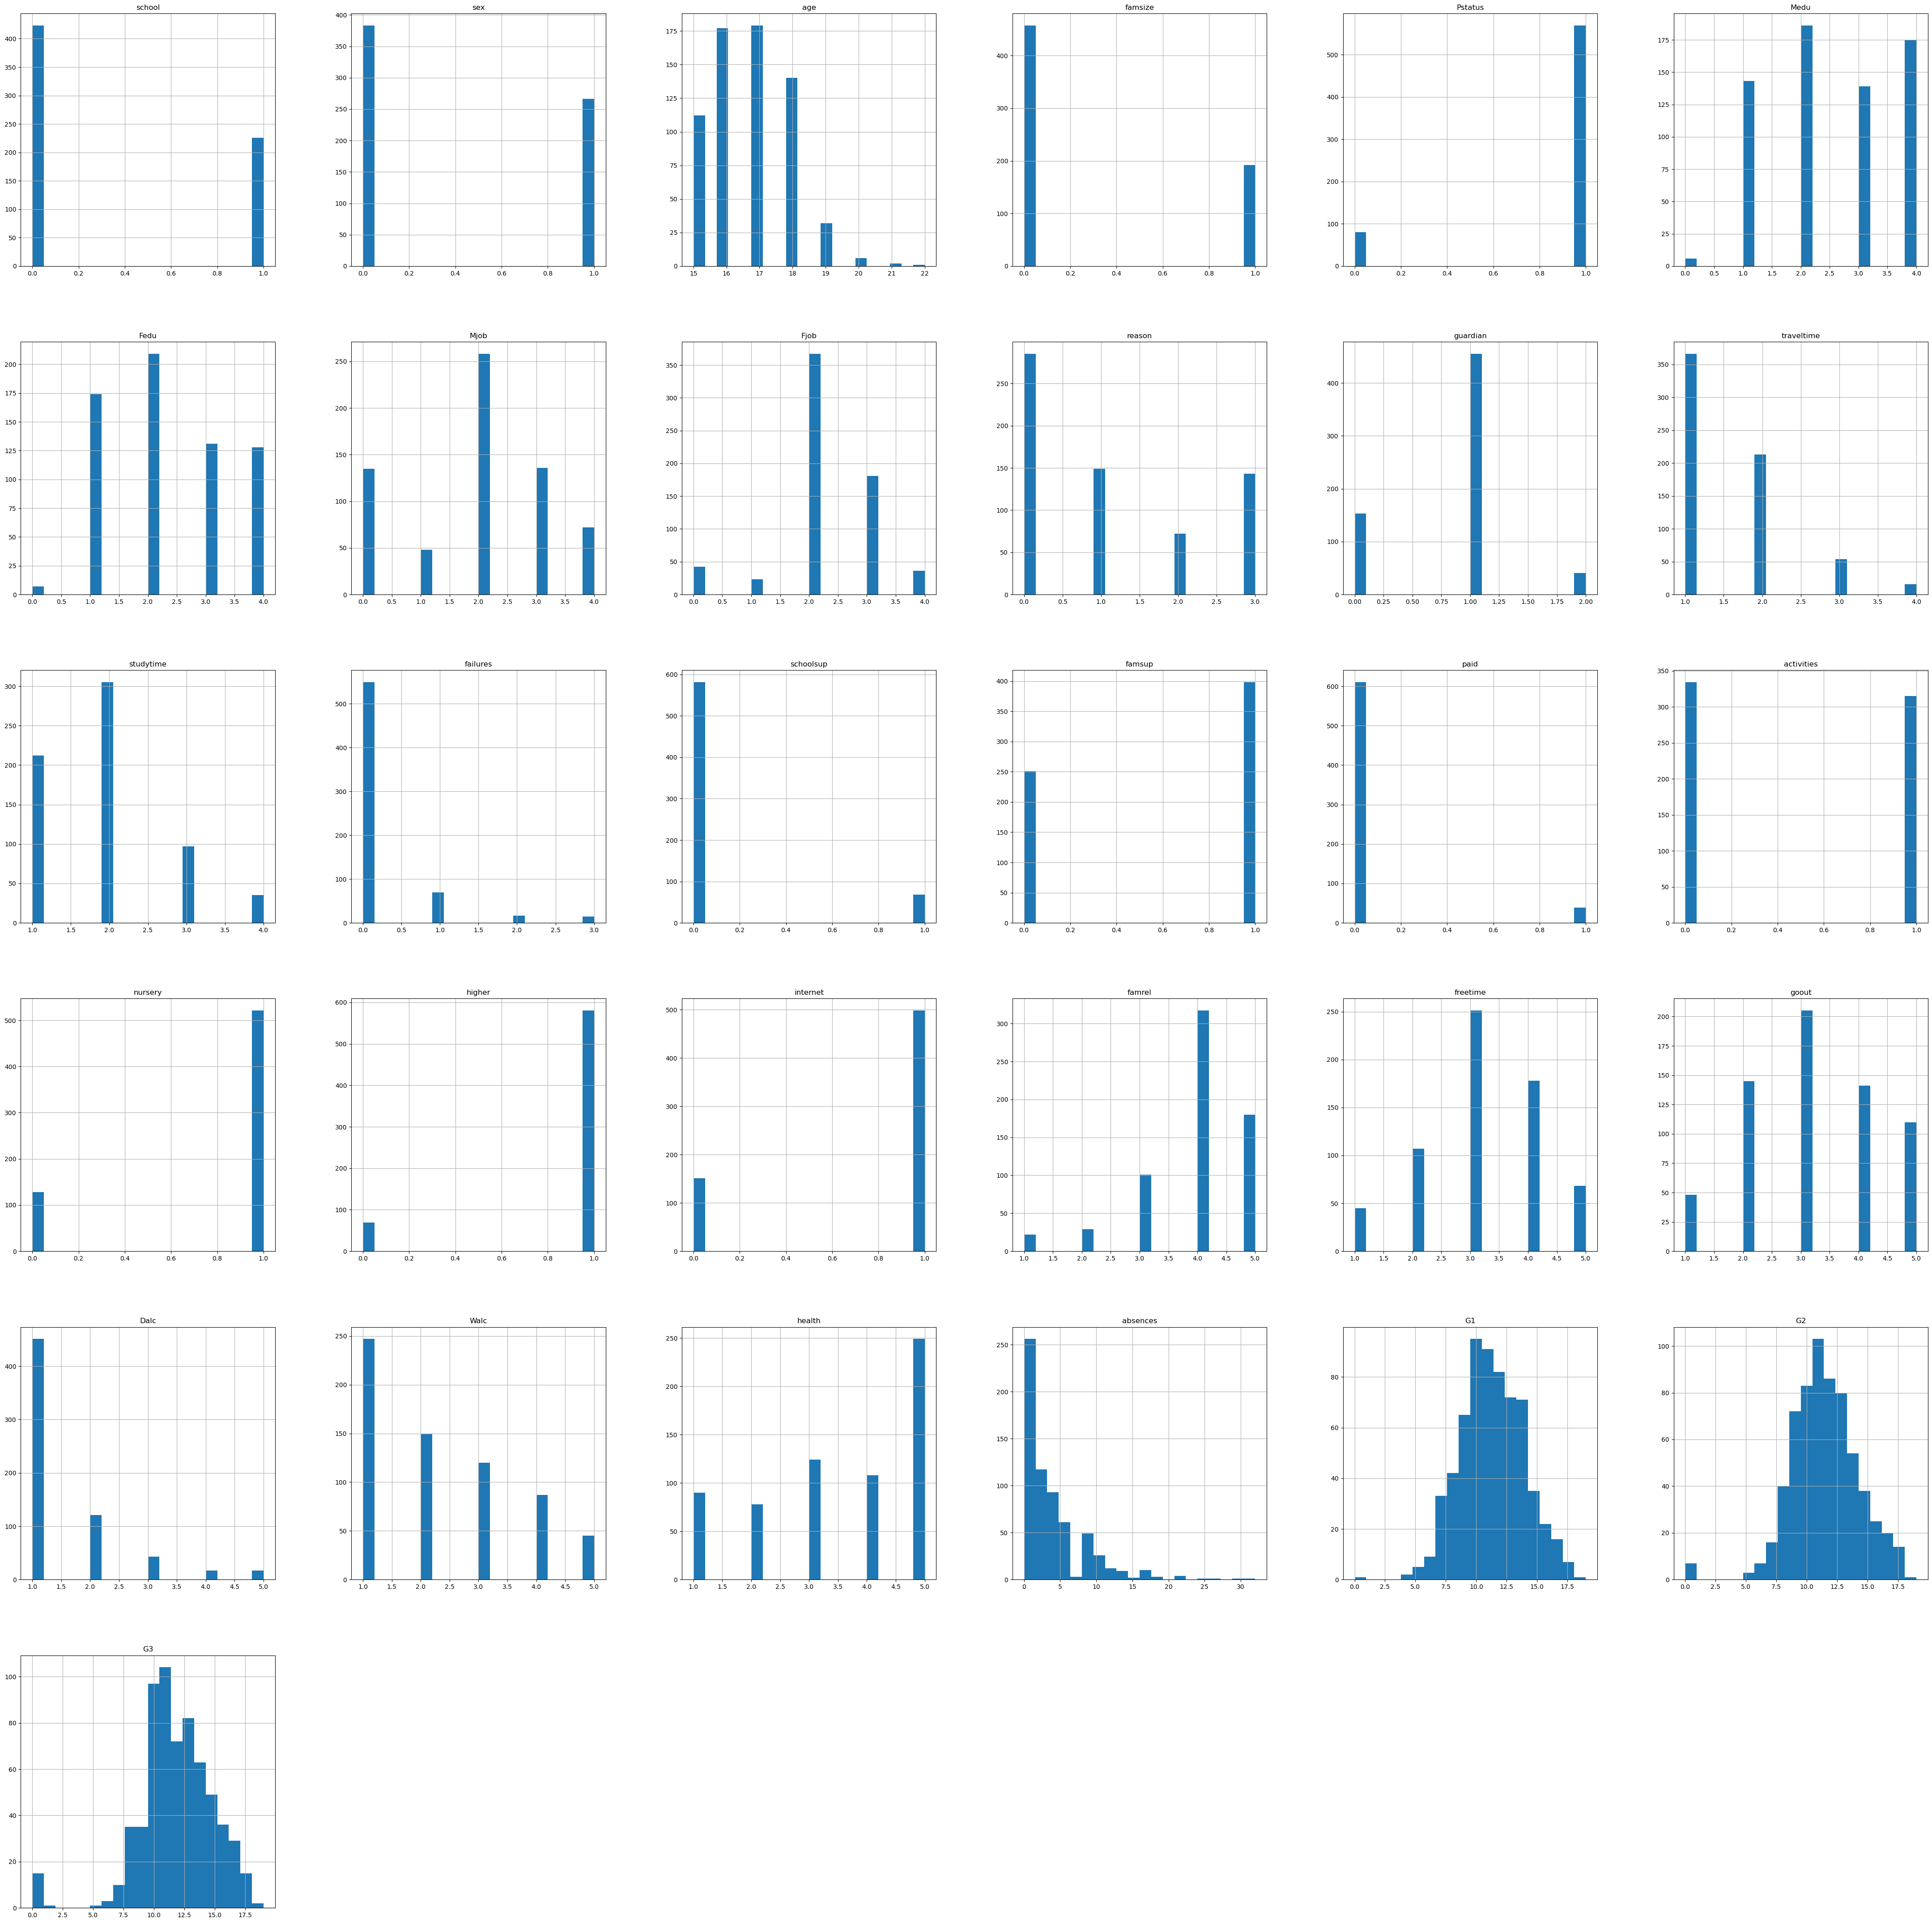

In [33]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(55,55))
plt.show()

Displot: Distplot or distribution plot of all columns to check the variation in the data distribution

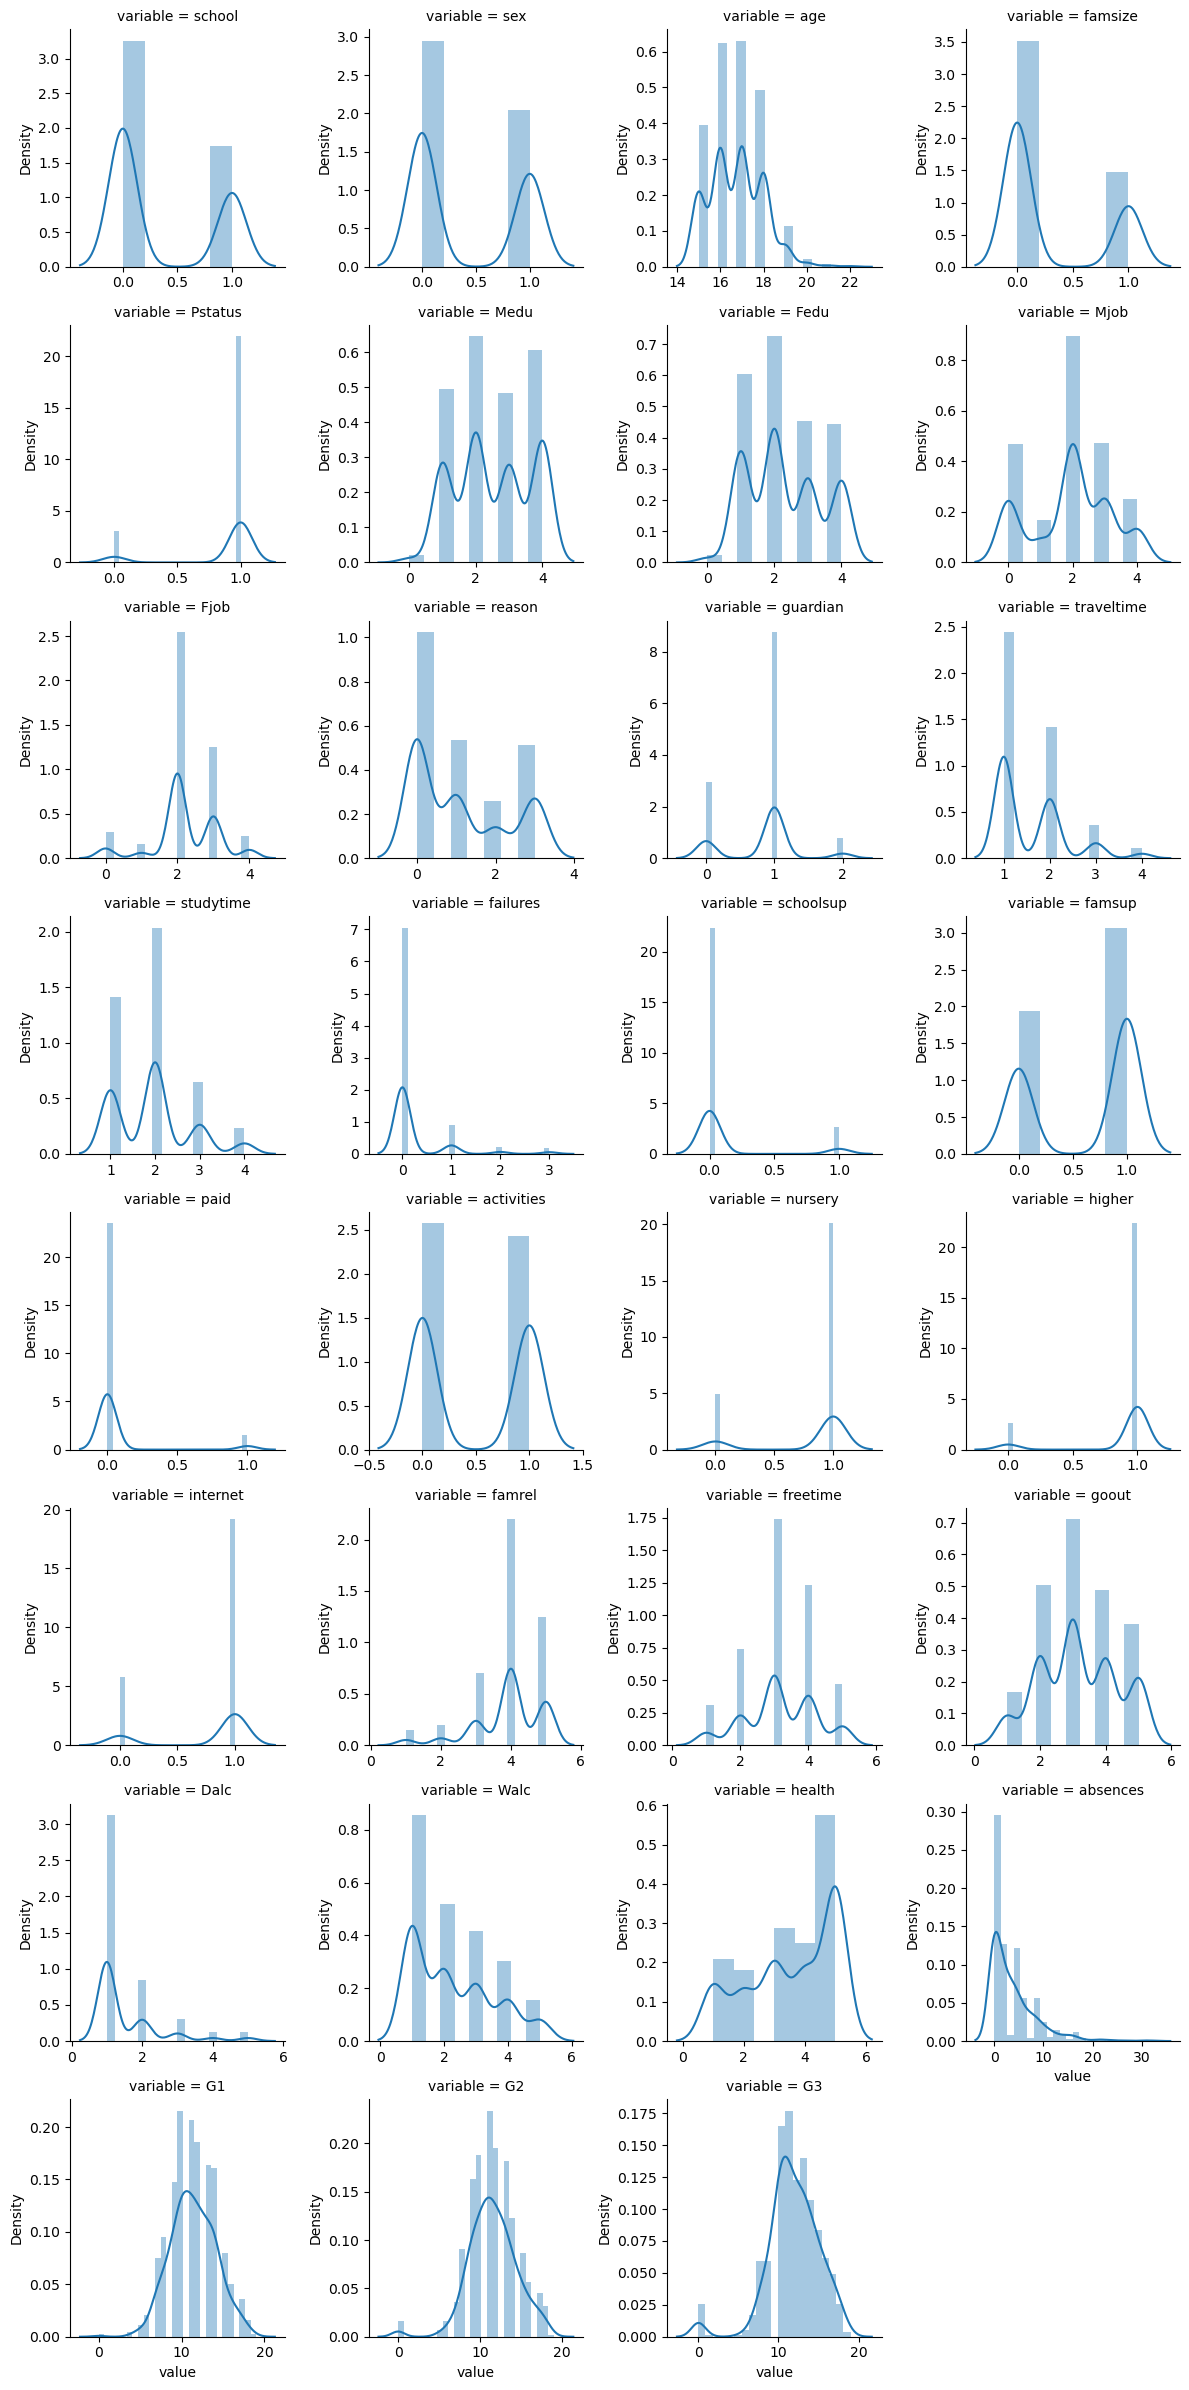

In [34]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

Heatmap to calculate correlation within feature variables

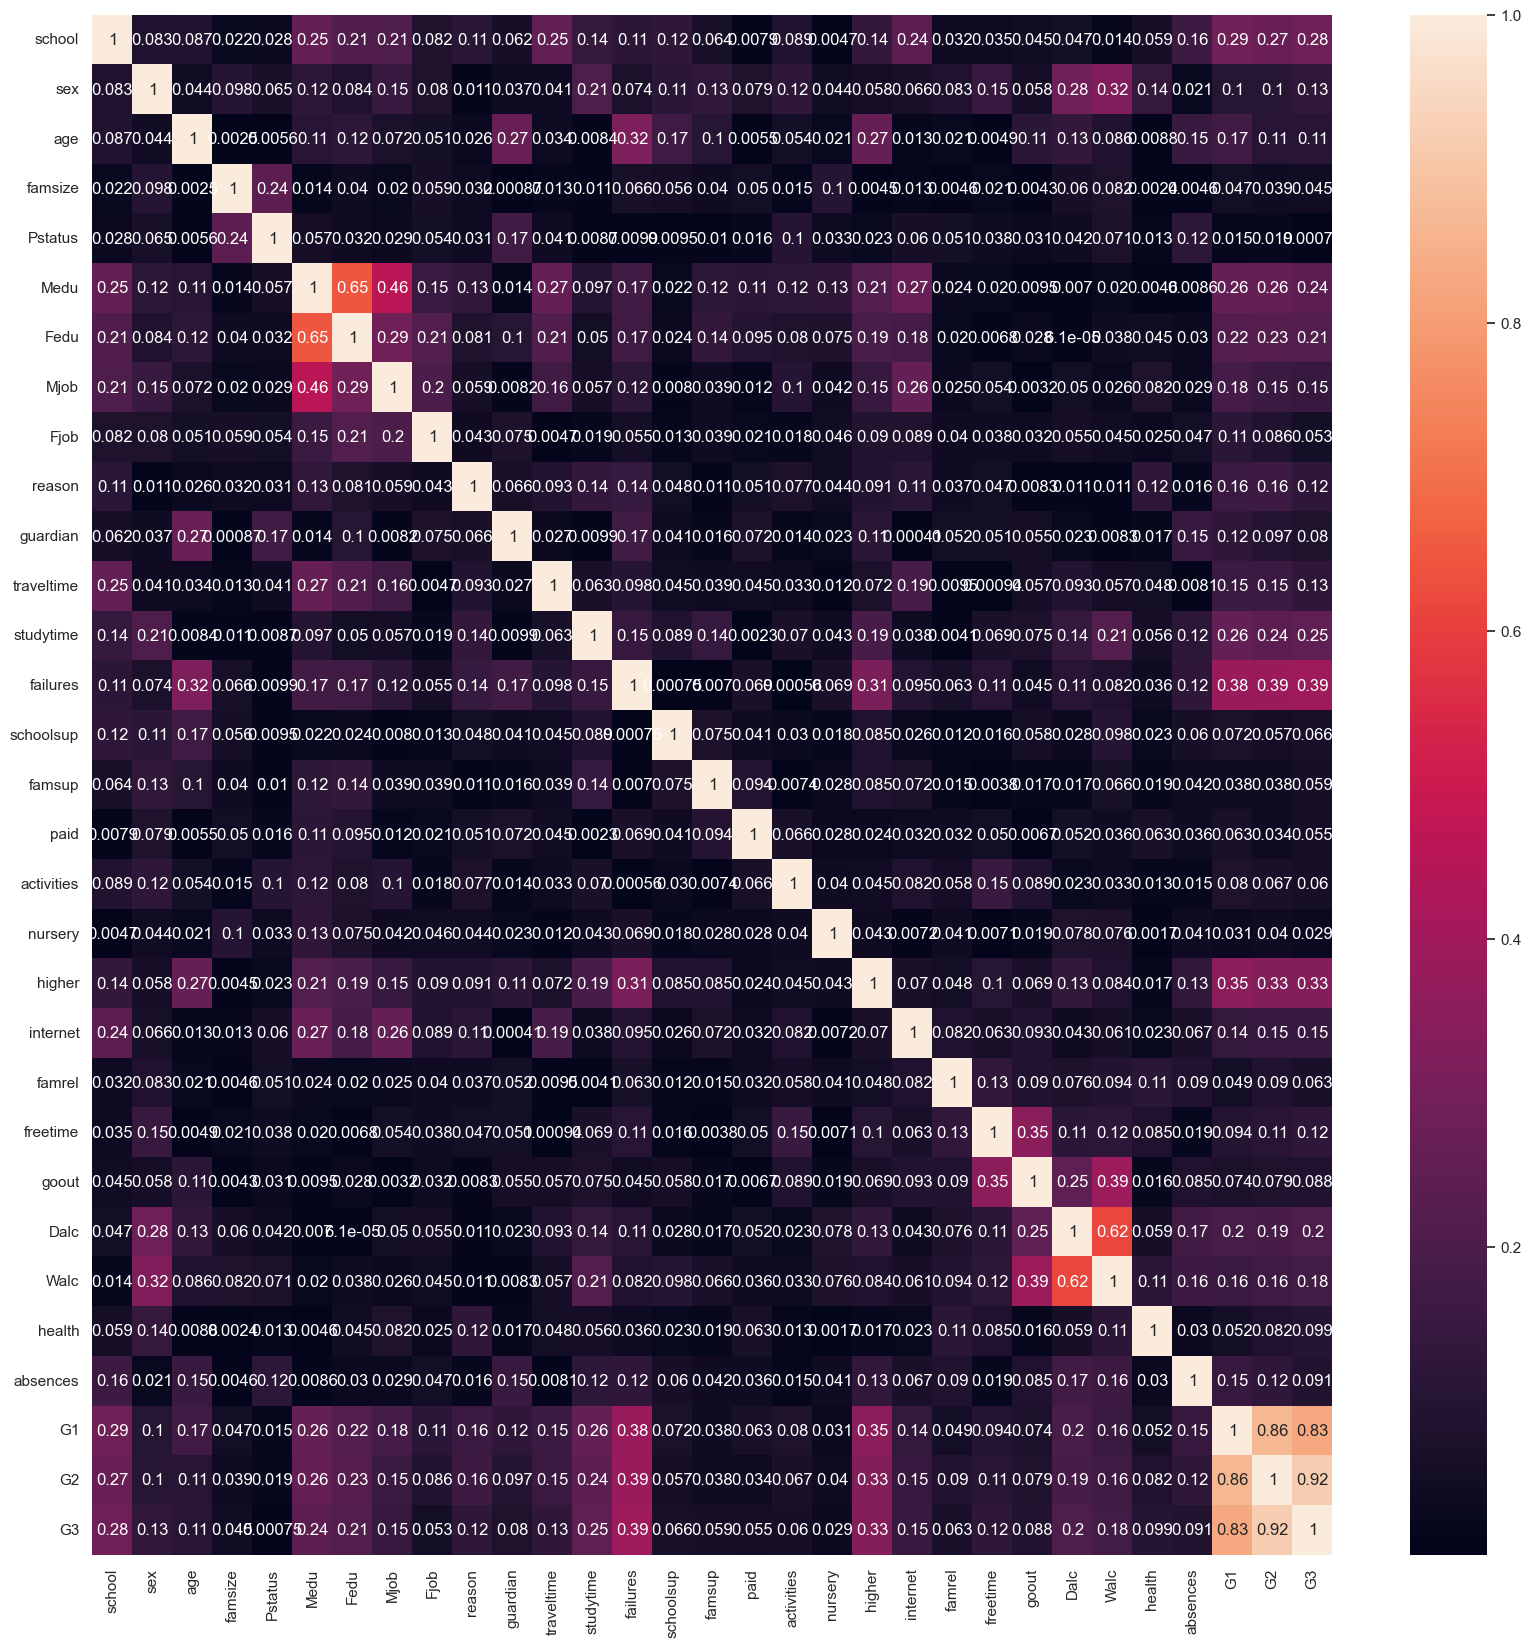

In [35]:
#correlation plot
sns.set(rc={'figure.figsize':(20, 20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

In [36]:
corr

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,0.083050,0.087170,0.022252,0.028120,0.254787,0.209806,0.206829,0.081872,0.109754,...,0.031597,0.034666,0.044632,0.047169,0.014169,0.058599,0.163933,0.292626,0.269776,0.284294
sex,0.083050,1.000000,0.043662,0.098205,0.064700,0.119127,0.083913,0.149635,0.080466,0.010732,...,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,0.104109,0.104005,0.129077
age,0.087170,0.043662,1.000000,0.002470,0.005631,0.107832,0.121050,0.071770,0.050846,0.025855,...,0.020559,0.004910,0.112805,0.134768,0.086357,0.008750,0.149998,0.174322,0.107119,0.106505
famsize,0.022252,0.098205,0.002470,1.000000,0.239608,0.014325,0.039538,0.019600,0.059443,0.032321,...,0.004641,0.021257,0.004312,0.060482,0.081958,0.002448,0.004645,0.047230,0.038891,0.045016
Pstatus,0.028120,0.064700,0.005631,0.239608,1.000000,0.057174,0.031856,0.028874,0.054306,0.031486,...,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,0.117492,0.015251,0.018689,0.000754
Medu,0.254787,0.119127,0.107832,0.014325,0.057174,1.000000,0.647477,0.459337,0.152582,0.132855,...,0.024421,0.019686,0.009536,0.007018,0.019766,0.004614,0.008577,0.260472,0.264035,0.240151
Fedu,0.209806,0.083913,0.121050,0.039538,0.031856,0.647477,1.000000,0.290703,0.211604,0.080760,...,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
Mjob,0.206829,0.149635,0.071770,0.019600,0.028874,0.459337,0.290703,1.000000,0.202651,0.059397,...,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.028519,0.181551,0.153875,0.148252
Fjob,0.081872,0.080466,0.050846,0.059443,0.054306,0.152582,0.211604,0.202651,1.000000,0.042846,...,0.039500,0.037952,0.031913,0.055389,0.044607,0.025069,0.047477,0.109847,0.086343,0.052953
reason,0.109754,0.010732,0.025855,0.032321,0.031486,0.132855,0.080760,0.059397,0.042846,1.000000,...,0.036657,0.047001,0.008255,0.010735,0.010612,0.121866,0.015861,0.155556,0.157459,0.124969


Boxplot to find out outlier in the feature columns

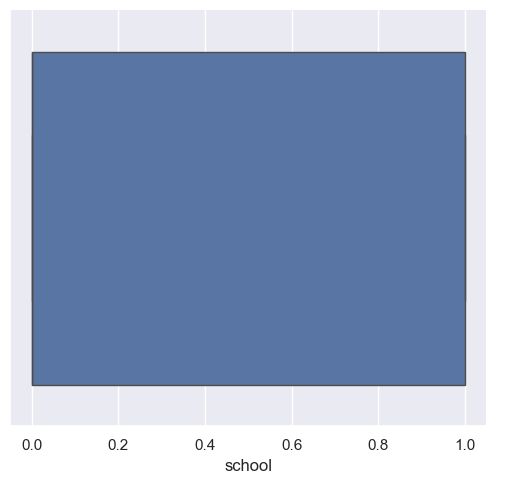

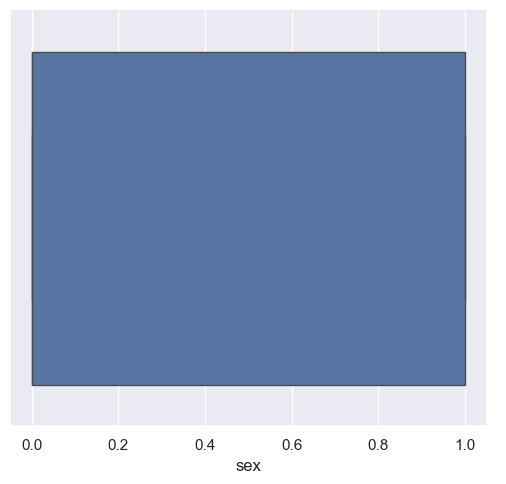

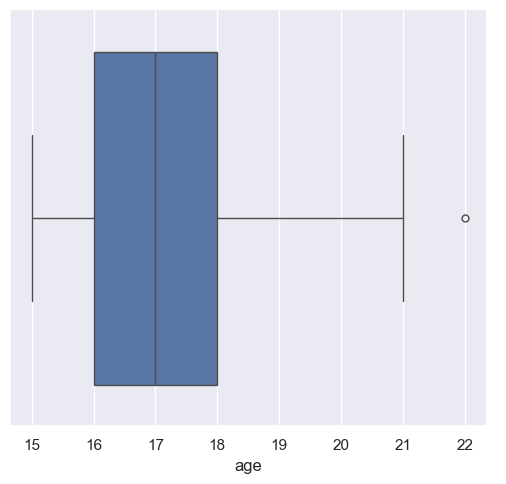

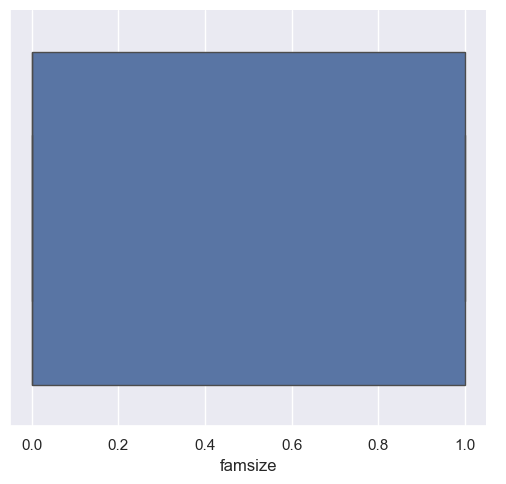

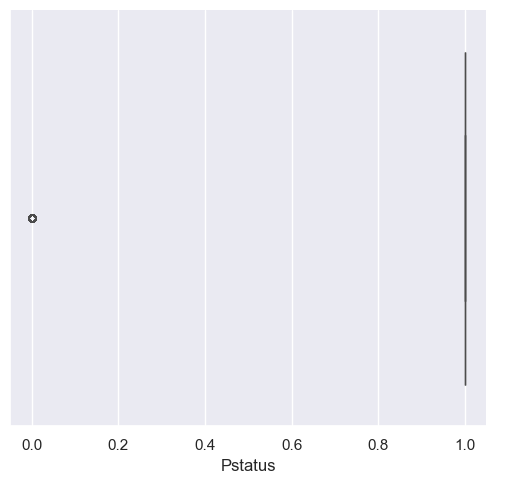

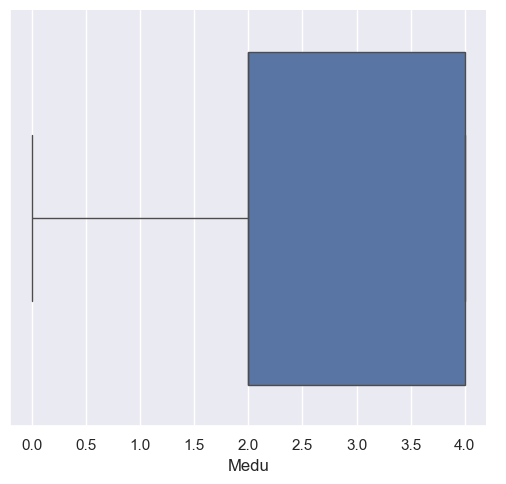

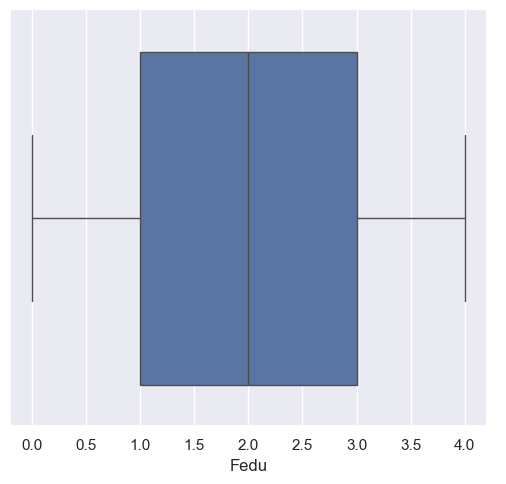

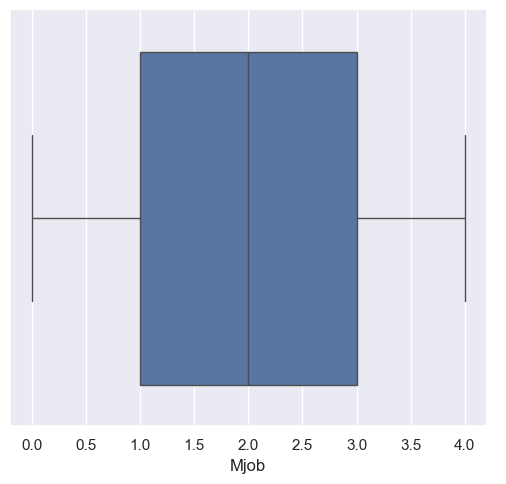

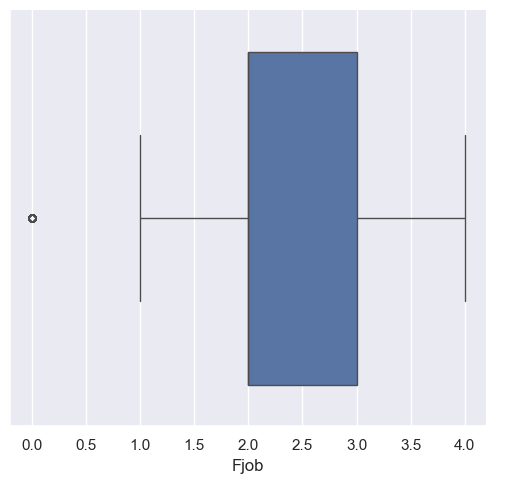

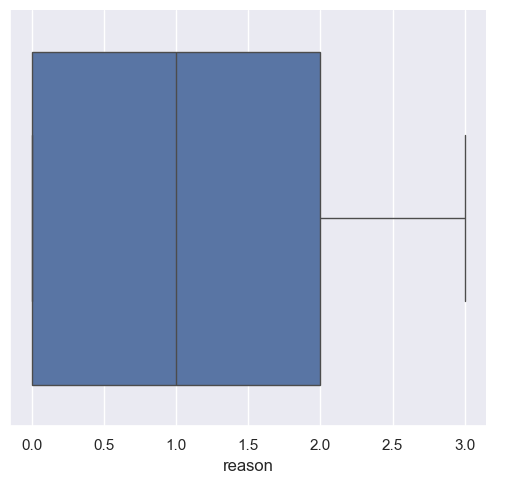

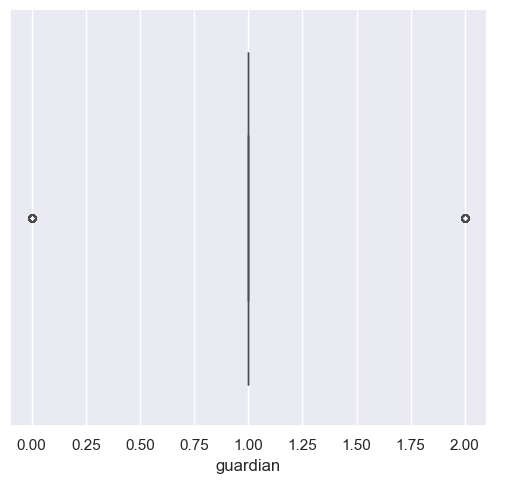

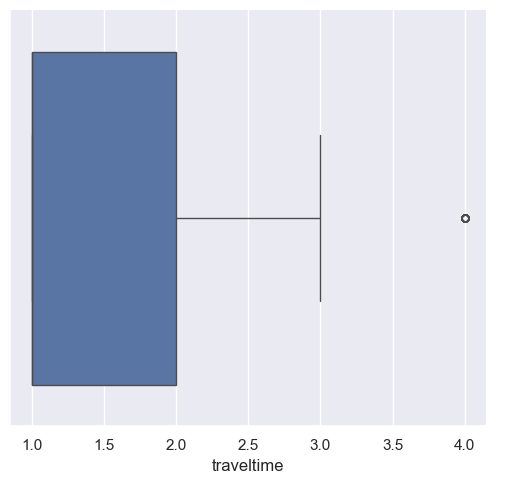

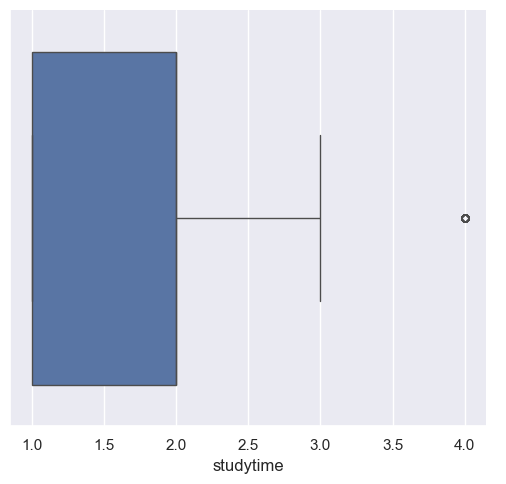

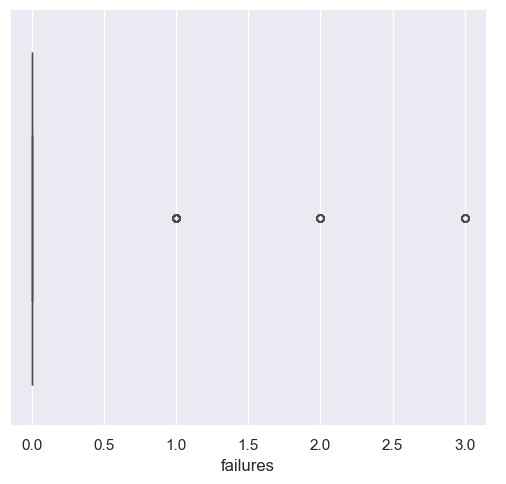

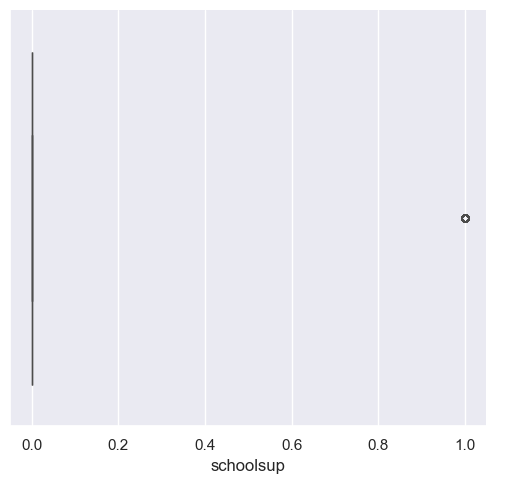

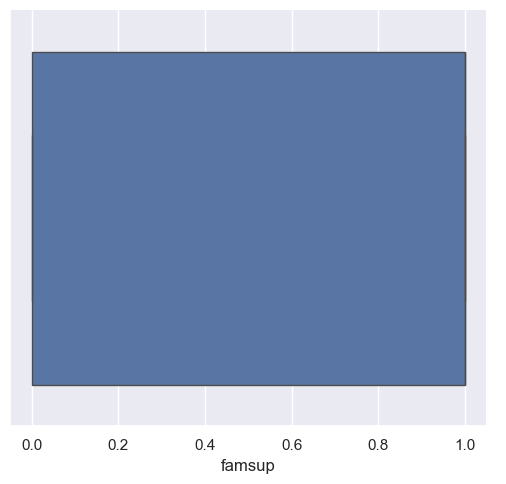

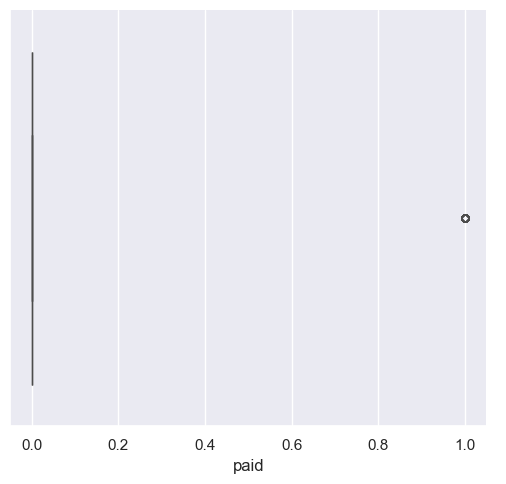

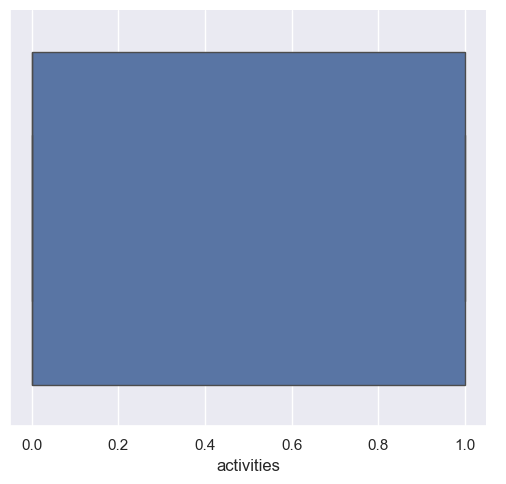

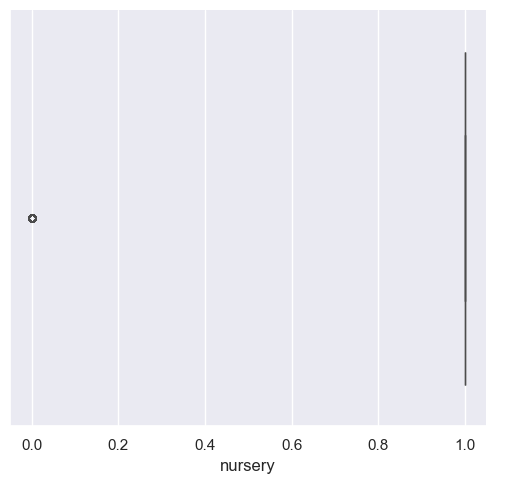

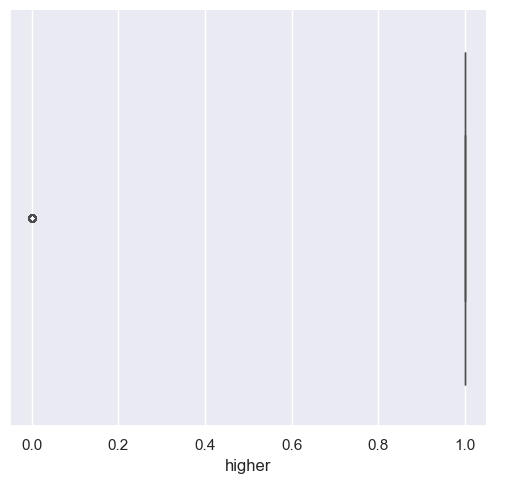

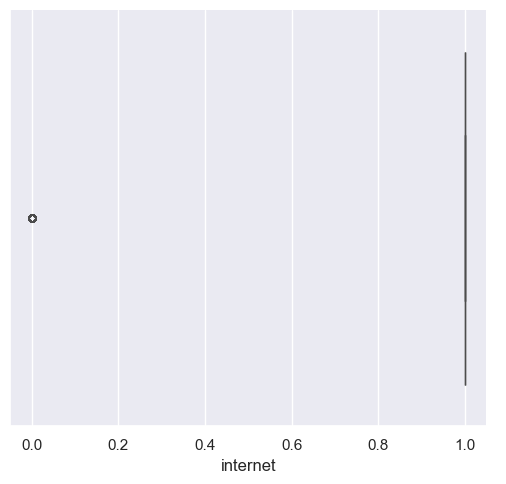

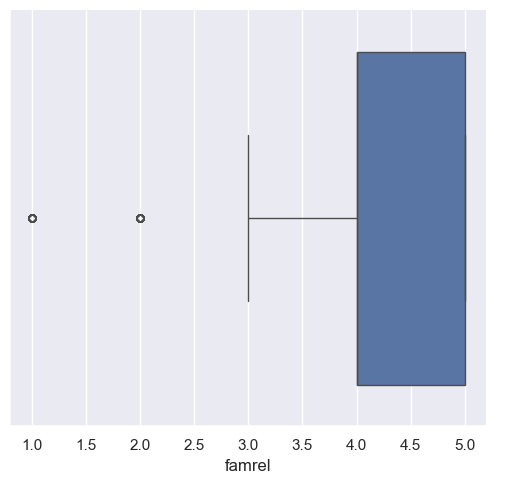

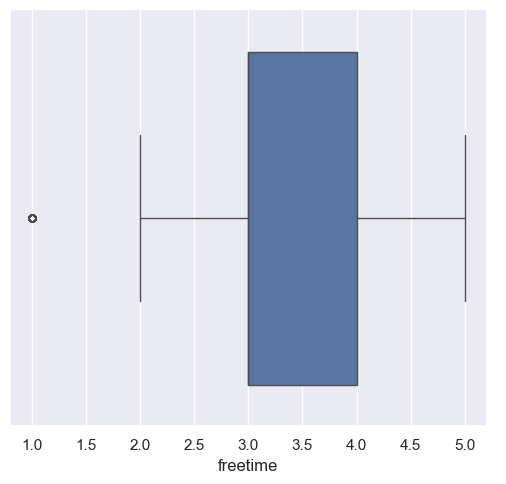

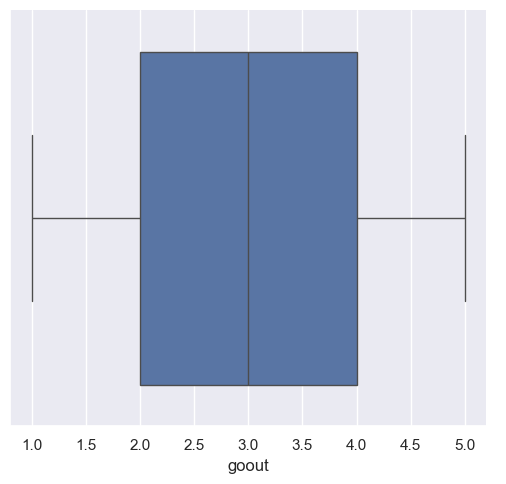

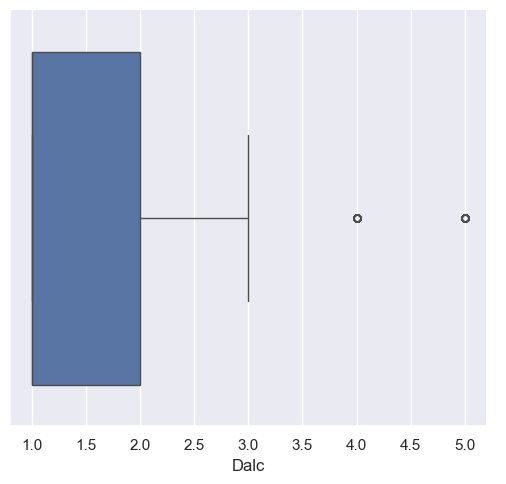

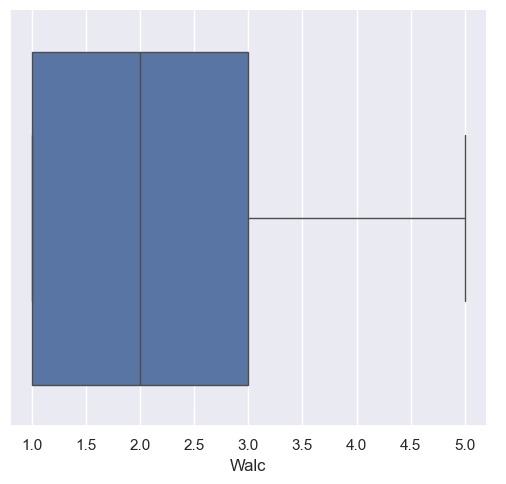

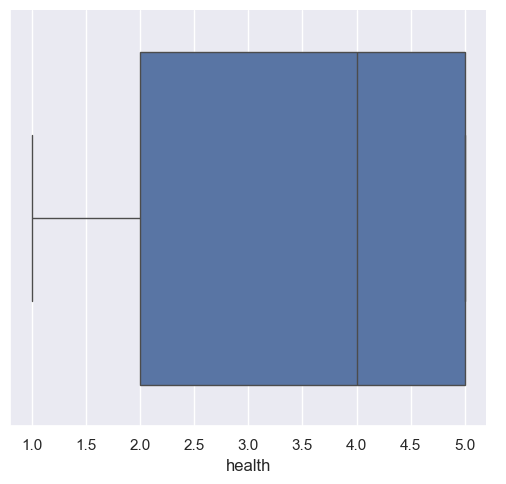

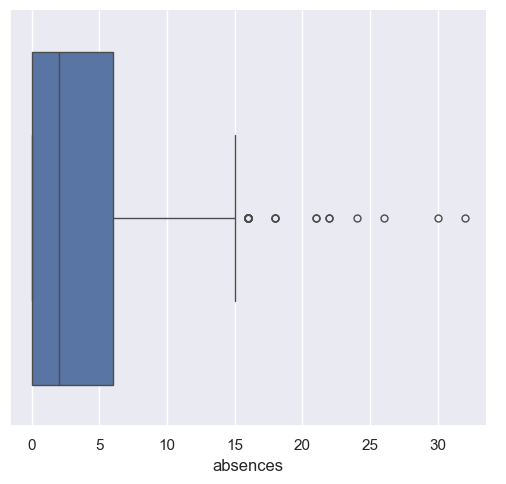

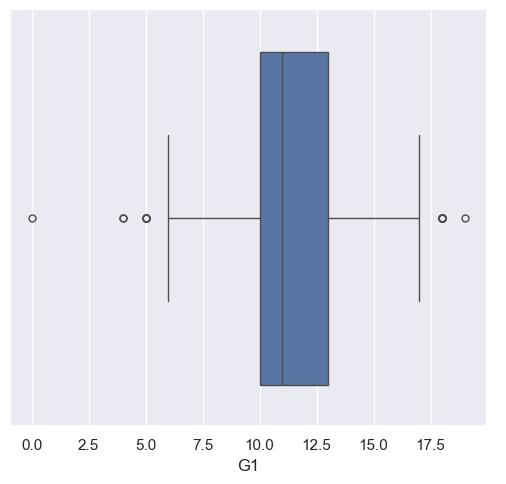

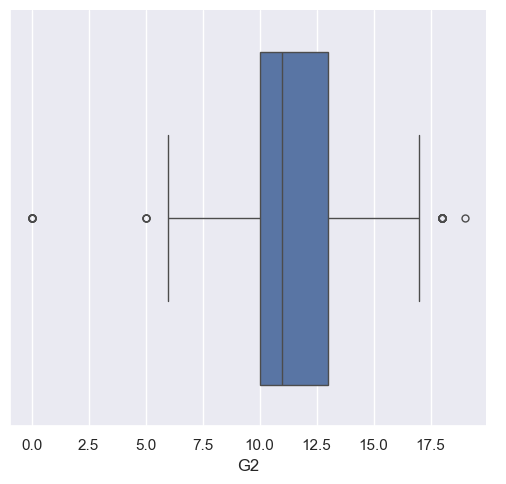

In [37]:
features = ['school','sex','age','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

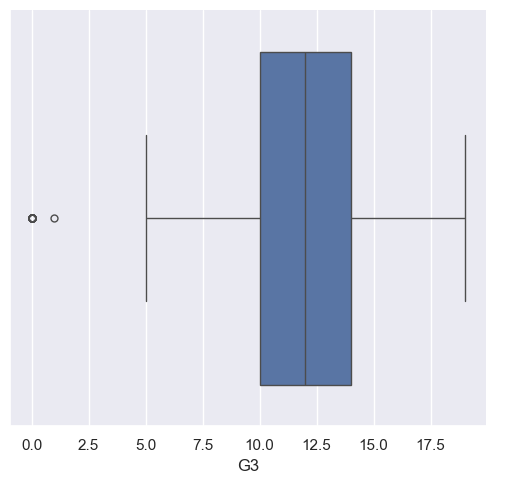

In [38]:
#for target variable
sns.catplot(data=df, x='G3', kind='box')

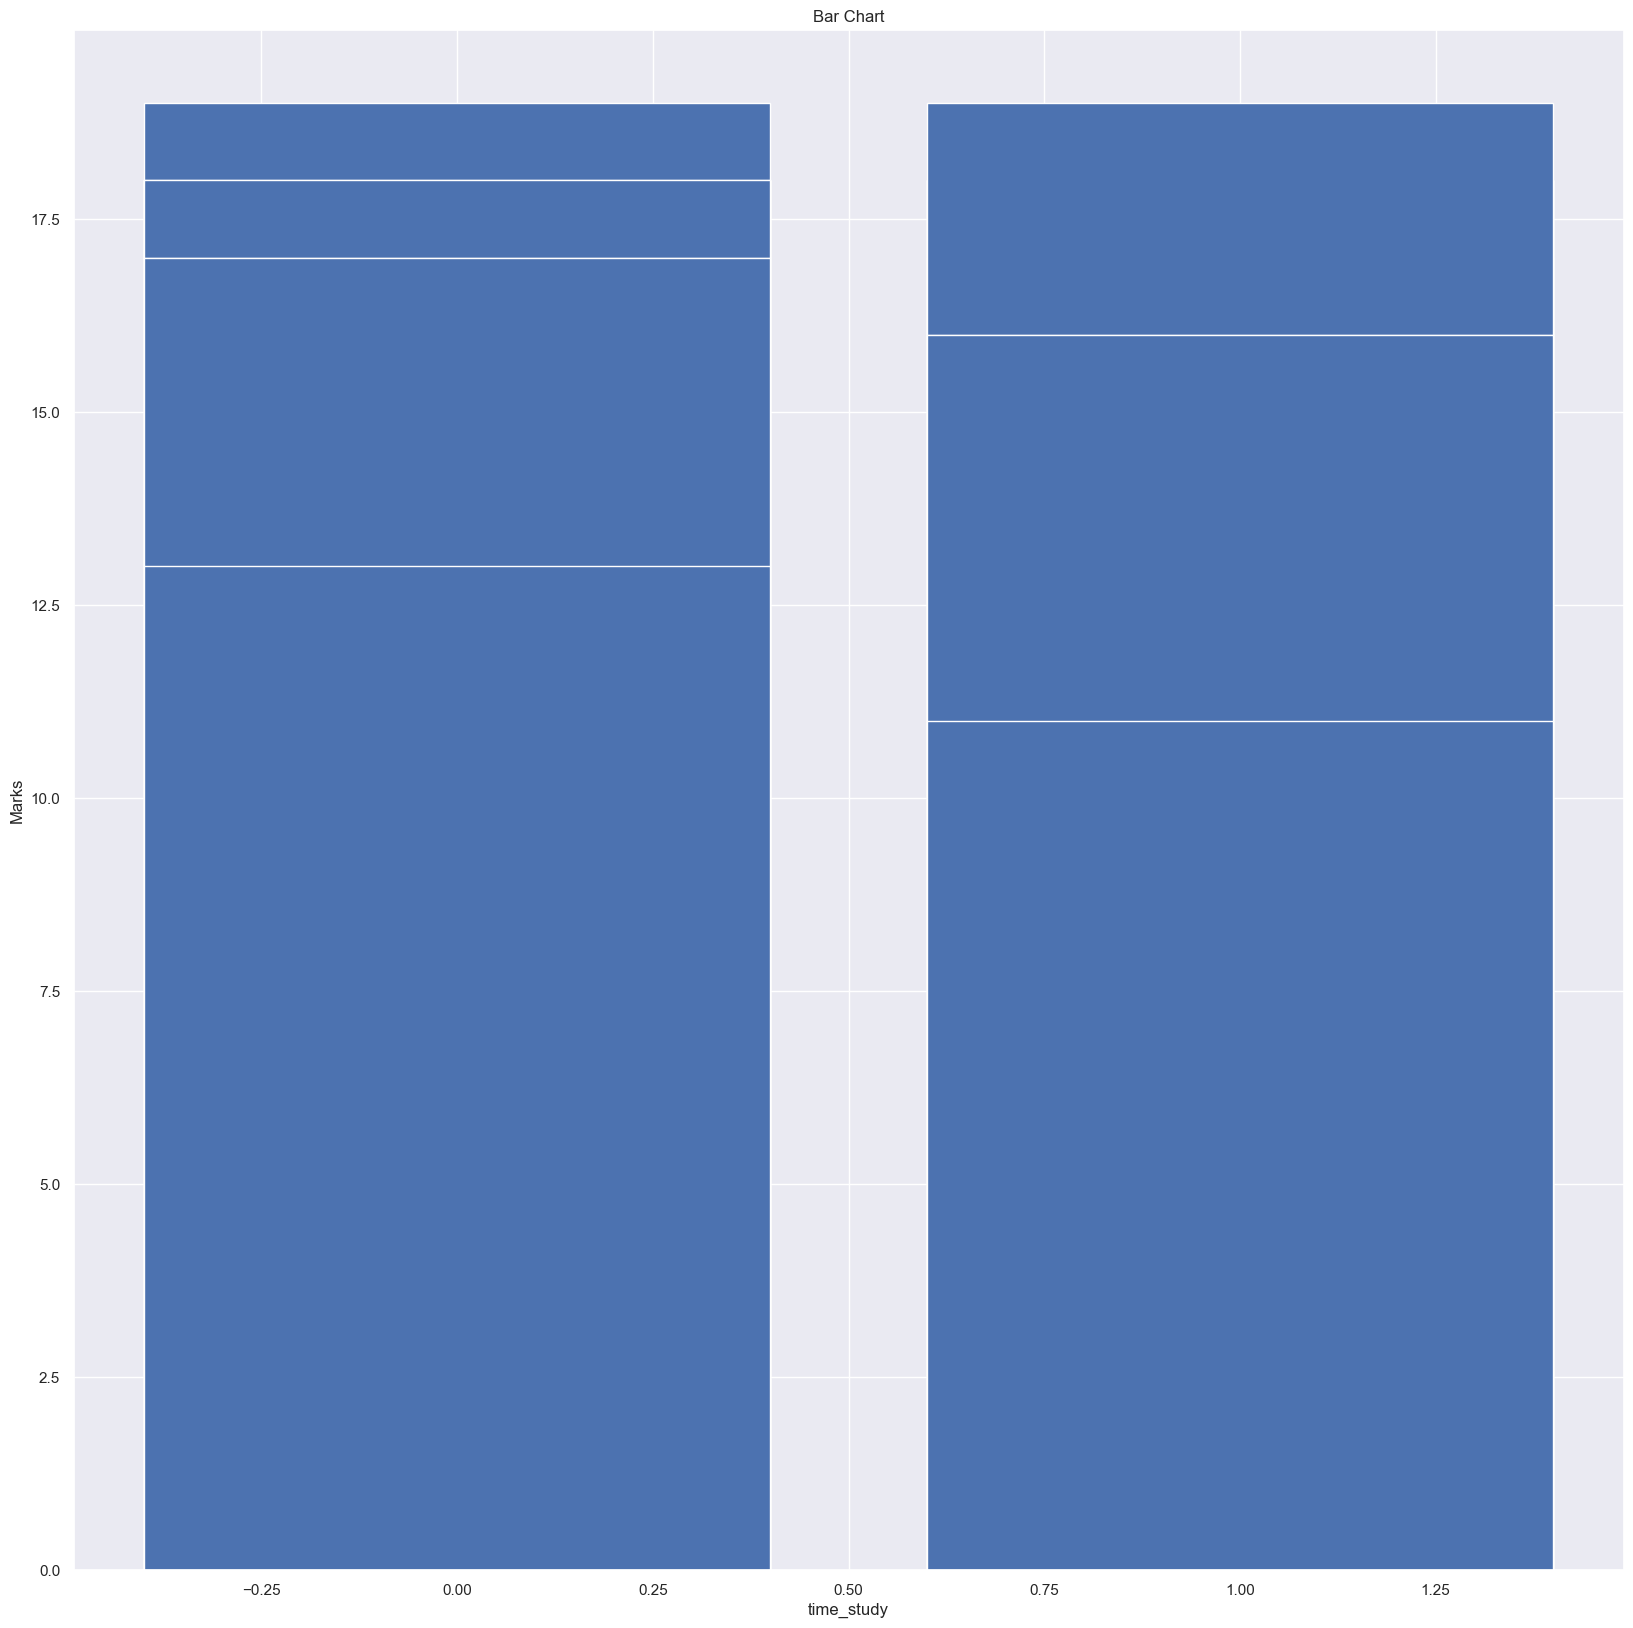

In [44]:
#defines the relation between the school opted to total Grade by the student.
plt.bar(df['school'], df['G3'])
plt.title("Bar Chart")
 # Setting the X and Y labels
plt.xlabel('time_study')
plt.ylabel('Marks')
 # Adding the legends
plt.show()

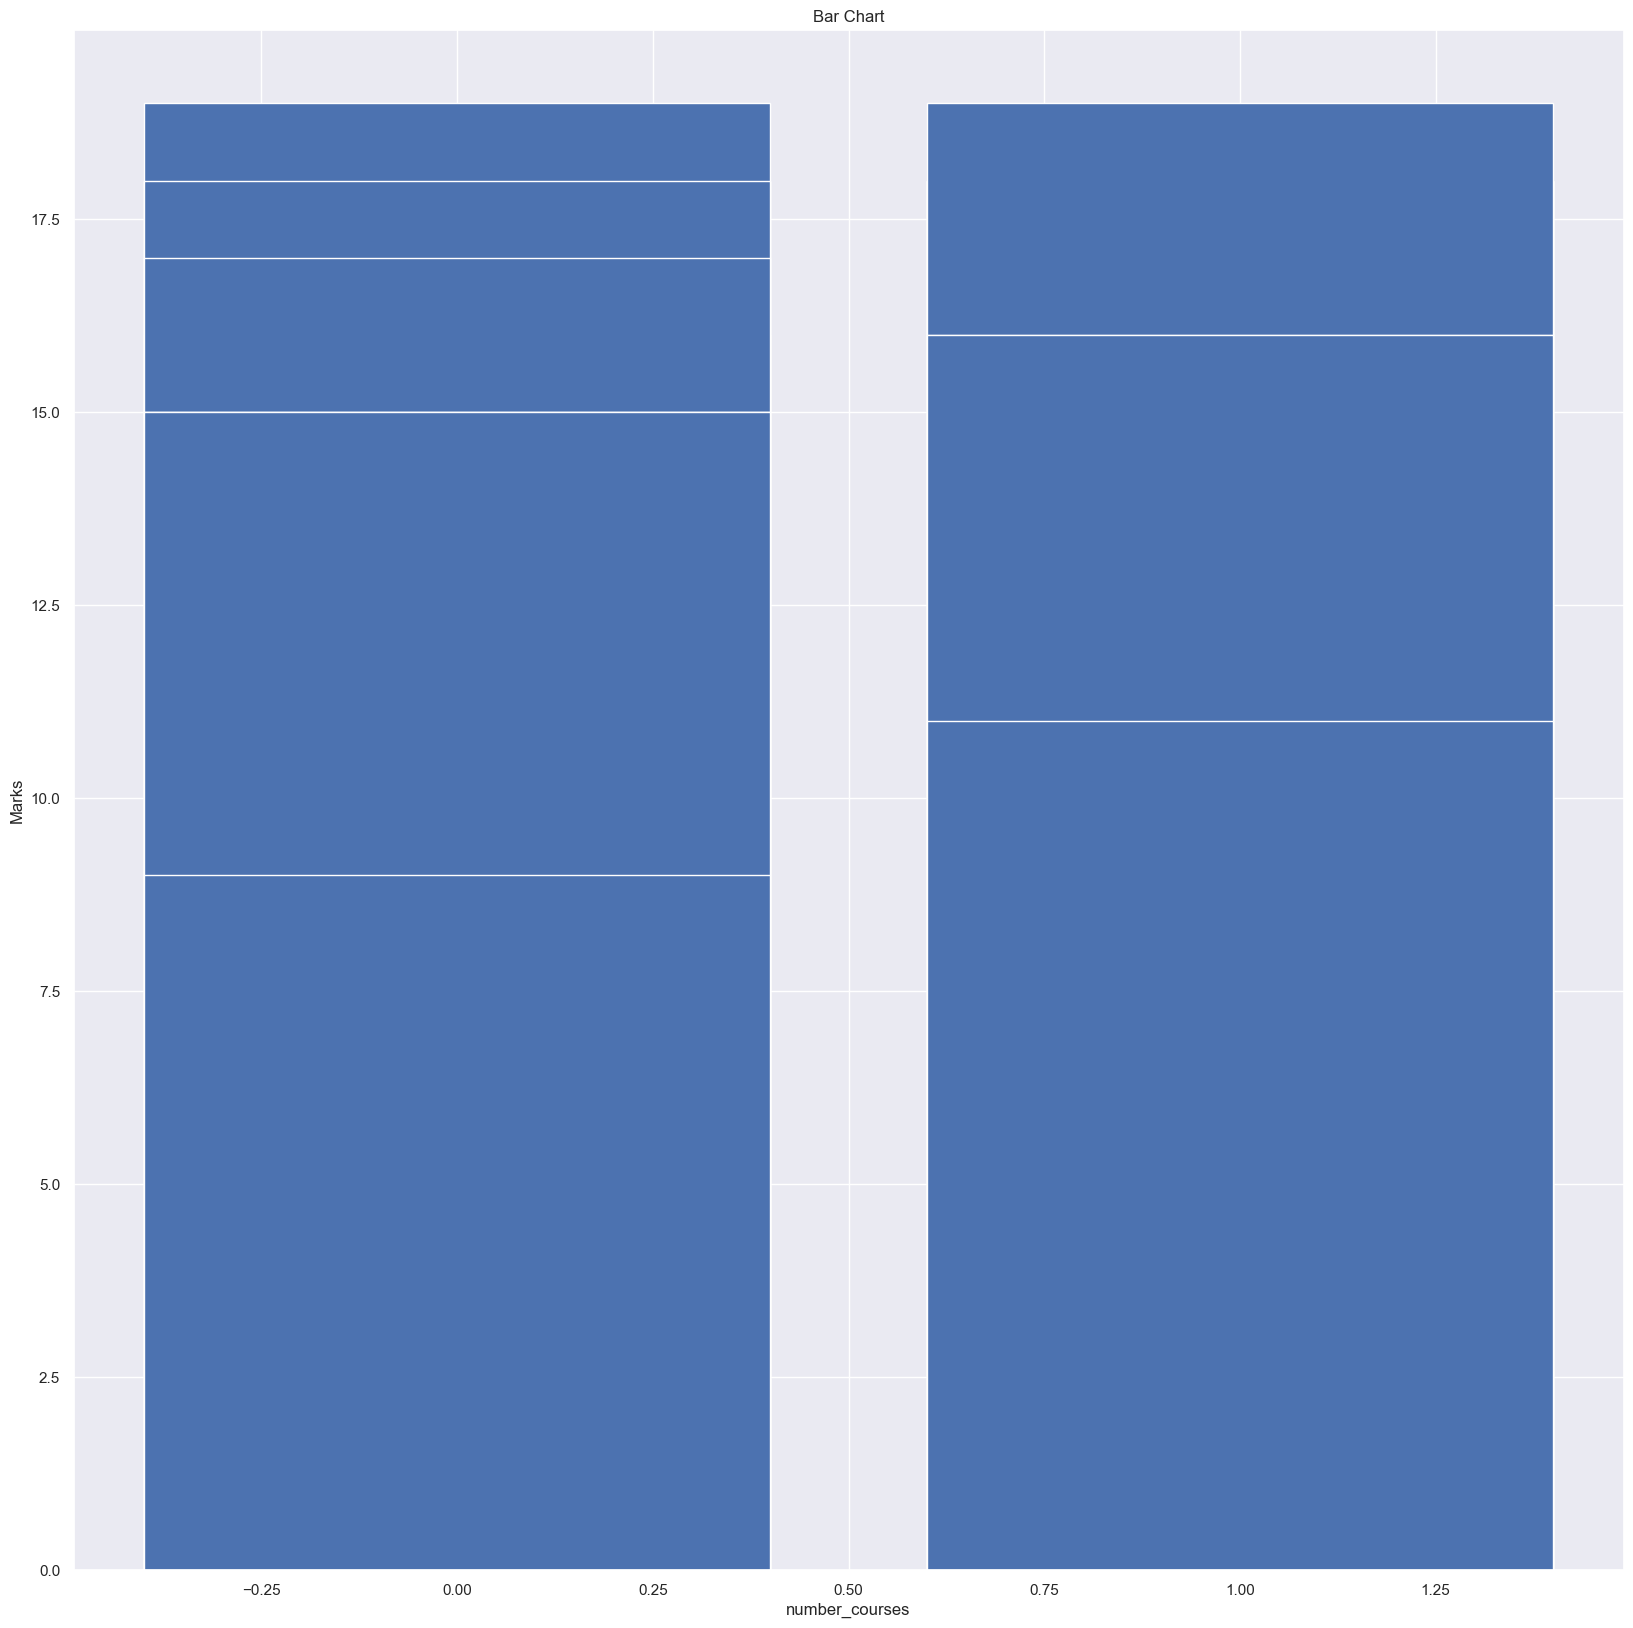

In [94]:
#defines the relation between the students with internet access to grade scored by the student.
plt.bar(df['internet'], df['G3'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('number_courses')
plt.ylabel('Marks')
 
# Adding the legends
plt.show()

In [46]:
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [47]:
target = 'G3'
# X will be the features
x = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]



In [48]:
x.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,4,4,0,4,0,...,0,4,3,4,1,1,3,4,0,11
1,0,0,17,0,1,1,1,0,2,0,...,1,5,3,3,1,1,3,2,9,11
2,0,0,15,1,1,1,1,0,2,2,...,1,4,3,2,2,3,3,6,12,13
3,0,0,15,0,1,4,2,1,3,1,...,1,3,2,2,1,1,5,0,14,14
4,0,0,16,0,1,3,3,2,2,1,...,0,4,3,2,1,2,5,0,11,13


In [49]:
y.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [50]:
x.shape

(649, 30)

In [51]:
y.shape

(649,)

In [52]:
# Train_test_split
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [53]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(519, 30) (519,) (130, 30) (130,)


PERFORMING LINERA REGRESSION

In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()  # creating the object 
lr.fit(x_train,y_train)  ## training
# it will calculate w0 and w1

LinearRegression()

In [56]:
lr.score(x_test,y_test)

0.9082915119783341

In [57]:
#Accuracy check of trainig data
from sklearn.metrics import r2_score
#Get R2 score
lr.score(x_train, y_train)

0.8467485673053239

In [58]:
#Accuracy of test data
lr.score(x_test, y_test)

0.9082915119783341

In [59]:
# Predict the values on X_test_scaled dataset 
y_predicted = lr.predict(x_test)
rg = r2_score(y_test,y_predicted)*100
rg

90.82915119783341

PERFORMING LASSO REGRESSION

In [61]:
#Using Lasso Regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

In [62]:
#looking for training data
clf.fit(x_train,y_train)

Lasso(alpha=0.1)

In [63]:
#Accuracy check for training data
clf.score(x_train,y_train)

0.8369169477796354

In [64]:
y_predicted1 = clf.predict(x_test)

In [65]:
#Accuracy check of test data
lg = r2_score(y_test,y_predicted1)*100
lg

90.8423634327471

In [66]:
cal_metric=pd.DataFrame([rg,lg],columns=["Student Grades"])
cal_metric.index=['Linear Regression',
                  'Lasso Regression']
                
cal_metric

,Student Grades
Linear Regression,90.829151
Lasso Regression,90.842363


PERFORMING LOGISTIC REGRESSION

In [67]:
threshold = 10
df['G3_bin'] = (df['G3'] >= threshold).astype(int)

target = 'G3_bin'
x = df.drop(columns=[target, 'G3'])  # Drop 'G3' and 'G3_bin' from features
y = df[target]

In [68]:
# Train_test_split
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [69]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(519, 30) (519,) (130, 30) (130,)


In [70]:
#Model BUilding
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train) #load 

LogisticRegression()

In [71]:
y_pred_log=log.predict(x_test)

In [72]:
y_pred_log

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [74]:
print('Training Accuracy',accuracy_score(y_train,log.predict(x_train)))

Training Accuracy 0.9518304431599229


In [75]:
print('Testing Accuracy',accuracy_score(y_test,log.predict(x_test)))

Testing Accuracy 0.9461538461538461


Save Model
Goal:- In this step we are going to save our model in pickel format file

In [87]:
import pickle
with open('Students_Performance_Prediction_linear.pkl', 'wb') as file:
    pickle.dump(lr, file)